<p align="center">

# **Brand Analysis of Sneak Energy Using Social Media in R.**
<H3>(Enhanced with additional Publicly Available Information)</H3>


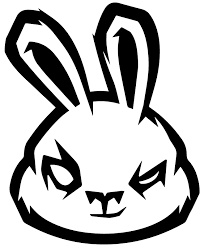
<center><i> Sneak Energy (2017). [new-store-logo_100x.png]. Retrieved from <a href:https://cdn.shopify.com/s/files/1/2351/3873/files/new-store-logo_100x.png?v=1567523919> Here </a>


# So who are Sneak Energy? 
... Their journey first started in 2016 when the company was incorporated. 
They market themselves predominately as a powdered zero sugar energy drink for creators and if they’re client base are an effective way to measure this I would have to agree. (Myself included)

A quick look at the likes UK Trustpilot or a Google Search for the brand will show their clients also look at the likes of G-Fuel and Huel. I personally view Huel more as a food supplement than an energy drink so I will use G-Fuel for comparison as  they are arguably most well-known competition Sneak currently have.

I’ve been using the powders to replace the canned alternatives since the first lockdown, and with todays release of Sneak Energy Blizzard V2.0. What better time than to complete a market analysis of the company’s performance and perception. 


## **The Datasets**

The datasets to be used are in CSV format and comprise of extracted live tweets using `rtweet` library alongside some manual data capture. 

The First Datasets we will review the companies social media scale and presence compared to the two previously mentioned competitors:
* **users_twts.csv**: User data of three twitter accounts extracted from Twitter
* **users_insta.csv**: User data of three instagram accounts extracted manually from Instagram
* **users_facebook.csv**: User data of three facebook accounts extracted manually from facebook


The Second Datasets we will use compared the brand engagement on these platforms and we will provide a sentiment analysis of the product as a whole (as well as specifically for blizzard). 
These have been limited to the last two weeks to keep a reasonable scale.

* **SneakTweets.csv**: Tweets searched on keyword 'sneakenergy' pre-extracted from Twitter.
* **SneakInsta.csv**: Instagram any recent posts and the comments in reply.
* **SneakFacebok.csv**: Facebook comments any recent posts and the comments in reply. 

Shared Fields

- `Date`: Date when this Tweet/comment was created and is the UK Date format
- `text`: The actual tweet/post text posted by an user


## **Getting started and installing packages**

In [1]:
# Install R packages
install.packages('httpuv')
install.packages('rtweet')

package 'httpuv' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\seanm\AppData\Local\Temp\Rtmp8g1XJ6\downloaded_packages
package 'rtweet' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\seanm\AppData\Local\Temp\Rtmp8g1XJ6\downloaded_packages


In [2]:

install.packages('reshape')
install.packages('qdapregex')


package 'reshape' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\seanm\AppData\Local\Temp\Rtmp8g1XJ6\downloaded_packages


Warning message:
"package 'qdapregex' is not available (for R version 3.6.1)"Warning message:
"Perhaps you meant 'qdapRegex' ?"

In [3]:
install.packages('tm')
install.packages('qdap')

package 'tm' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\seanm\AppData\Local\Temp\Rtmp8g1XJ6\downloaded_packages
package 'qdap' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\seanm\AppData\Local\Temp\Rtmp8g1XJ6\downloaded_packages


In [5]:

install.packages('syuzhet')
install.packages('wordcloud')
install.packages('RColorBrewer')

package 'syuzhet' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\seanm\AppData\Local\Temp\Rtmp8g1XJ6\downloaded_packages
package 'wordcloud' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\seanm\AppData\Local\Temp\Rtmp8g1XJ6\downloaded_packages
package 'RColorBrewer' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\seanm\AppData\Local\Temp\Rtmp8g1XJ6\downloaded_packages


## **1. Compare brand popularity by extracting and comparing follower counts**

### Twitter

We can compare followers count for competing companies by using their screen names and follower counts or other engagement metrics.

Note:
- `screen_name`: The screen name or twitter handle that an user identifies themselves with.
- `followers_count`: The number of followers a twitter account currently has.

The followers count for a twitter account indicates the popularity of that account and is a measure of social media influence.

To extract user data directly from twitter, we usually load the `rtweet` package, obtain and create Twitter API V2.0 access tokens according to the instructions in this [article](https://developer.twitter.com/en/docs/twitter-api/getting-started/guide) and extract user data with the `lookup_users()` function which takes screen names as input and extracts user data from twitter accounts.

<b>Load `rtweet` library </b>
- library(rtweet)

<b>Store name of users to extract data on twitter accounts</b>
- users <- c("SneakEnergy","XGamerEnergy","GFuelEnergy")

<b>Extract user data for the twitter accounts stored in users</b><p>
- tab users_twts <- lookup_users(users)

<b>Save extracted data as a CSV file using rtweets built in function 'write_as_csv'.</b><p>
- write_as_csv(users_twts,'users_twts.csv')<p>

<i>Please note you may need to change the directory depending on where you R.exe is saved see below </i> [article](http://rfunction.com/archives/1001)


In [6]:
# Import extracted user data from the csv file into a dataframe
path = 'data/users_twts.csv'

users_twts = read.csv(path)

In [7]:
# View dimensions of the dataframe
dim(users_twts)

# View few rows of the dataframe
head(users_twts)

[1]  3 90

user_id,status_id,created_at,screen_name,text,source,display_text_width,reply_to_status_id,reply_to_user_id,reply_to_screen_name,...,statuses_count,favourites_count,account_created_at,verified,profile_url,profile_expanded_url,account_lang,profile_banner_url,profile_background_url,profile_image_url
x869556811698929664,x1347591693537783808,2021-01-08 17:11:11,SneakEnergy,@HilaryRampey_ @AmateurGamer18 Nice!!! It will get you through <U+0001F91F>,AgoraPulse Manager,NA,x1347577292432797698,x156745023,HilaryRampey_,...,11565,4328,2017-05-30 14:11:14,FALSE,https://t.co/KuN0to1VoH,http://sneakenergy.com,NA,https://pbs.twimg.com/profile_banners/869556811698929664/1610119268,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/1344593914699927555/UslcTO05_normal.jpg
x2929679697,x1347547526484750338,2021-01-08 14:15:41,XGamerEnergy,"@ImLishh That's a pretty good wish, I'd say. https://t.co/5O00GFHgRG",Twitter Web App,NA,x1347547259089674240,x1520472446,ImLishh,...,26569,54458,2014-12-18 15:48:46,FALSE,https://t.co/cAfyMog0U7,http://www.x-gamer.com,NA,https://pbs.twimg.com/profile_banners/2929679697/1609859521,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/1346474532157026305/yGryvgG4_normal.jpg
x1206216140,x1347582905699196933,2021-01-08 16:36:16,GFuelEnergy,<U+0001F494> Ain't no love in these #Rust streets <U+0001F494> CR: @soartealemon https://t.co/uX6pfLswHr,Twitter for iPhone,NA,,,,...,110289,210284,2013-02-21 22:56:12,TRUE,https://t.co/qt7pHqWI4i,http://GFUEL.com,NA,https://pbs.twimg.com/profile_banners/1206216140/1608127273,http://abs.twimg.com/images/themes/theme3/bg.gif,http://pbs.twimg.com/profile_images/1339209016308797441/G1h20HE__normal.jpg


From the user data, extract details of screen names and follower counts for the 4 twitter accounts into a dataframe.

In [8]:
# Create a data frame of screen names and followers count
user_df <- users_twts[,c("screen_name","followers_count")]

In [9]:
# Display and compare the follower counts for the 4 twitter accounts
head(user_df)

screen_name,followers_count
SneakEnergy,32007
XGamerEnergy,34935
GFuelEnergy,1645213


#### We can see that "G Fuel" is the most popular with number of followers exceeding a million. 

#### However when you consider they were founded in 2012 in the US and the twitter account created 2013 this is to be expected.

#### Considering the legnth of time Sneak Energy have been in the market they are definitely a threat to G Fuel's market (especially considering the account was created in 2017). However a fairer comparison for their current position would be XGamerEnergy.

#### Reviewing recent flucutations in Sneak Energy Twitter followers `2%` of are from the `last 30 days. (683 new followers)`                                                
#### Compared with XGamerEnergy which in the same period has a lost `0.08% (277 followers)`

### Facebook

We can compare followers count for competing companies by using their screen names and follower counts or other engagement metrics.

Note:
- `screen_name`: The screen name or twitter handle that an user identifies themselves with.
- `followers_count`: The number of followers a twitter account currently has.

The followers count for a facebook account indicates the popularity of that account and is a measure of social media influence as this will influence how many people see the post.

To extract user data directly from facebook, we manually mined the information around and mapped this similarly to the key fields from our twitter data.

In [10]:
# Import extracted user data from the csv file into a dataframe
path = 'data/users_facebook.csv'

users_facebook = read.csv(path)

In [11]:
# View dimensions of the dataframe
dim(users_facebook)

# View few rows of the dataframe
head(users_facebook)

[1] 3 9

created_at,screen_name,followers_count,friends_count,posts_count,account_created_at,verified,profile_url,lang
08/01/2021,SneakEnergy,93751,NA,NA,30/05/2017,No,https://www.facebook.com/SneakEnergy/,en
08/01/2021,XGamerEnergy,4149,NA,NA,18/12/2014,No,https://www.facebook.com/XGamerEnergy/,en
08/01/2021,GFuelEnergy,266798,NA,NA,21/02/2013,Yes,https://www.facebook.com/GFuelEnergy/,en


From the user data, extract details of screen names and follower counts for the 3 facebook accounts into a dataframe.

In [12]:
# Create a data frame of screen names and followers count
user_fb_df <- users_facebook[,c("screen_name","followers_count")]

In [13]:
# Display and compare the follower counts for the 3 Facebook accounts
head(user_fb_df)

screen_name,followers_count
SneakEnergy,93751
XGamerEnergy,4149
GFuelEnergy,266798


#### Consistently we see that "G Fuel" is the most popular with number of followers exceeding a million. 

#### However when you consider they were founded in 2012 in the US this is to be expected.

#### Considering the legnth of time Sneak Energy have been in the market they are defineityle a threat to G Fuel's market. However a fairer comparison for their current position would be XGamerEnergy.

#### Reviewing recent flucutations in Sneak Energy Facebook followers it is similar with `3.2%` from the `last 30 days. (3005 new followers)`                                             
####  XGamerEnergy's Facebook performance is stronger than twitter for the same period and has gained `3.1% (129 followers)`

### Instagram

We can compare followers count for competing companies by using their screen names and follower counts or other engagement metrics.

Note:
- `screen_name`: The screen name or twitter handle that an user identifies themselves with.
- `followers_count`: The number of followers a twitter account currently has.

The followers count for a instagram account indicates the popularity of that account and is a measure of social media influence as this will influence how many people see the post.

To extract user data directly from instagram, we manually mined the information around and mapped this similarly to the key fields from our twitter data.

In [14]:
# Import extracted user data from the csv file into a dataframe
path = 'data/users_insta.csv'

users_insta = read.csv(path)

In [15]:
# View dimensions of the dataframe
dim(users_insta)

# View few rows of the dataframe
head(users_insta)

[1] 3 9

created_at,screen_name,followers_count,friends_count,posts_count,account_created_at,verified,profile_url,lang
08/01/2021 00:00,SneakEnergy,153340,257,458,21/10/2016,No,https://www.instagram.com/sneakenergy/,en
08/01/2021 00:00,XGamerEnergy,10814,135,2364,26/07/2015,No,https://www.instagram.com/xgamerenergy/,en
08/01/2021 00:00,GFuelEnergy,3062099,533,6442,19/07/2013,Yes,https://www.instagram.com/gfuelenergy/,en


From the user data, extract details of screen names and follower counts for the 3 instagram accounts into a dataframe.

In [16]:
# Create a data frame of screen names and followers count
user_in_df <- users_insta[,c("screen_name","followers_count")]

In [17]:
# Display and compare the follower counts for the 3 instagram accounts
head(user_in_df)

screen_name,followers_count
SneakEnergy,153340
XGamerEnergy,10814
GFuelEnergy,3062099


#### We can see that again "G Fuel" is the most popular with number of followers exceeding a million. 

#### However when you consider they were founded in 2012 in the US this is to be expected.

#### Considering the legnth of time Sneak Energy have been in the market they are defineityle a threat to G Fuel's market. However a fairer comparison for their current position would be XGamerEnergy.

#### Reviewing recent flucutations in Sneak Energy Instagram followers it is similar with `2.9%` from the `last 30 days. (4590 new followers)`                                                
#### XGamerEnergy's Instagram performance is also positive for the same period and has gained  `5.2% (570 followers)`

So upon reviewing recent social media metrics it would be fair to say Sneak is in a period of growth. So now lets dig deeper into that recent activity and look at the sentiment of the brand.

---
<center><h1> Deeper Dive</h1> </center>

---


By looking at other engagement measures we can try to understand factors which may explain the brand performance. 

Note:
- `retweet_count`: The number of engagement a tweet currently has.

The retweet count for a tweet is a good indicator of how many people have positively reacted and been exposed to a tweet. Coupled with the text field this should give us a good indaction of the cause of this growth.

In [18]:
# Import extracted tweets on "tesla" in CSV format into a dataframe
SneakTweets_df = read.csv("data/SneakTweets.csv")
SneakFacebook_df = read.csv("data/SneakFacebook.csv")
SneakInsta_df = read.csv("data/SneakInsta.csv")
# Create a data frame of tweet text and retweet count
rtwt <- SneakTweets_df[,c("text","retweet_count")]

# View few rows of the new dataframe
head(rtwt)

text,retweet_count
@Tempest_Valdyr Thanks for understanding. You too!,0
@Emrysplays @CptjuicyTV Hey! The UK isn't in the EU anymore - UK Blizzard launch will go ahead as planned!,0
@alexlewis310195 @AverageDadFB Today is Blizzard day Alex! 3pm GMT Ã°Å¸Å½â€°,0
We've had a few questions about what this means for the UK. Thankfully the UK launch goes ahead as planned - Blizzard will still launch today at 3pm GMT! Ã°Å¸Å’Â¨Ã¢ï¿½â€žÃ¯Â¸ï¿½Ã°Å¸â„¢Å’ https://t.co/wCaVfBfLcN,4
@fut_fg Ã°Å¸Ëœâ€šÃ°Å¸Ëœâ€šÃ°Å¸Ëœâ€š,0
@PayZet Unfortunately it does. It should be lifted soon Ã°Å¸Â¤Å¸,0


Sort in descending order of the retweet counts using arrange() from dplyr library

In [19]:
# Import library
library(dplyr)

# Sort data frame based on descending order of retweet counts
rtwt_sort <- arrange(rtwt,desc(retweet_count))

# View sorted output
head(rtwt_sort)

Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



text,retweet_count
ItÃ¢â‚¬â„¢s official. BLIZZARD IS BACK. January 8th. Ã°Å¸Å½Â¥ ft Sneak Ambassador @harleyxngel (insta) https://t.co/Rz3j8rlTG6,97
Blizzard is back. The seasonal flavour returns Jan 8th. DonÃ¢â‚¬â„¢t miss your chance to stock up for the year ahead Ã¢ï¿½â€žÃ¯Â¸ï¿½ https://t.co/t1MDh3cucR,74
"The Blizzard is closing in. Get ready for the drop - Jan 8th, 3pm GMT Ã°Å¸â€¡Â¬Ã°Å¸â€¡Â§ // 10am EST Ã°Å¸â€¡ÂºÃ°Å¸â€¡Â¸ . Ã°Å¸â€œÂ· d.grade [on IG] Camera: A7RIV Lens: 24-70 f2.8 https://t.co/sWYmHDlwSw",62
"We couldnÃ¢â‚¬â„¢t bring back Blizzard, without bringing back a hoodie drop. Drops Jan 8th. https://t.co/S0V9X2ikYO",62
"The 24-hour countdown begins. Blizzard's ready - are you? Ã¢ï¿½â€žÃ¯Â¸ï¿½ Dropping 3pm GMT, 10am ET. Ã°Å¸â€œÂ· @imLogan_ Ã°Å¸â€œÂ· @flashbachphotos https://t.co/b0uHJkYUOY",59
It returns. Blizzard drops 8th January. 2021 already beats 2020. https://t.co/y37cgbGxK1,56


## The most retweeted item is 'Blizzard is Back'

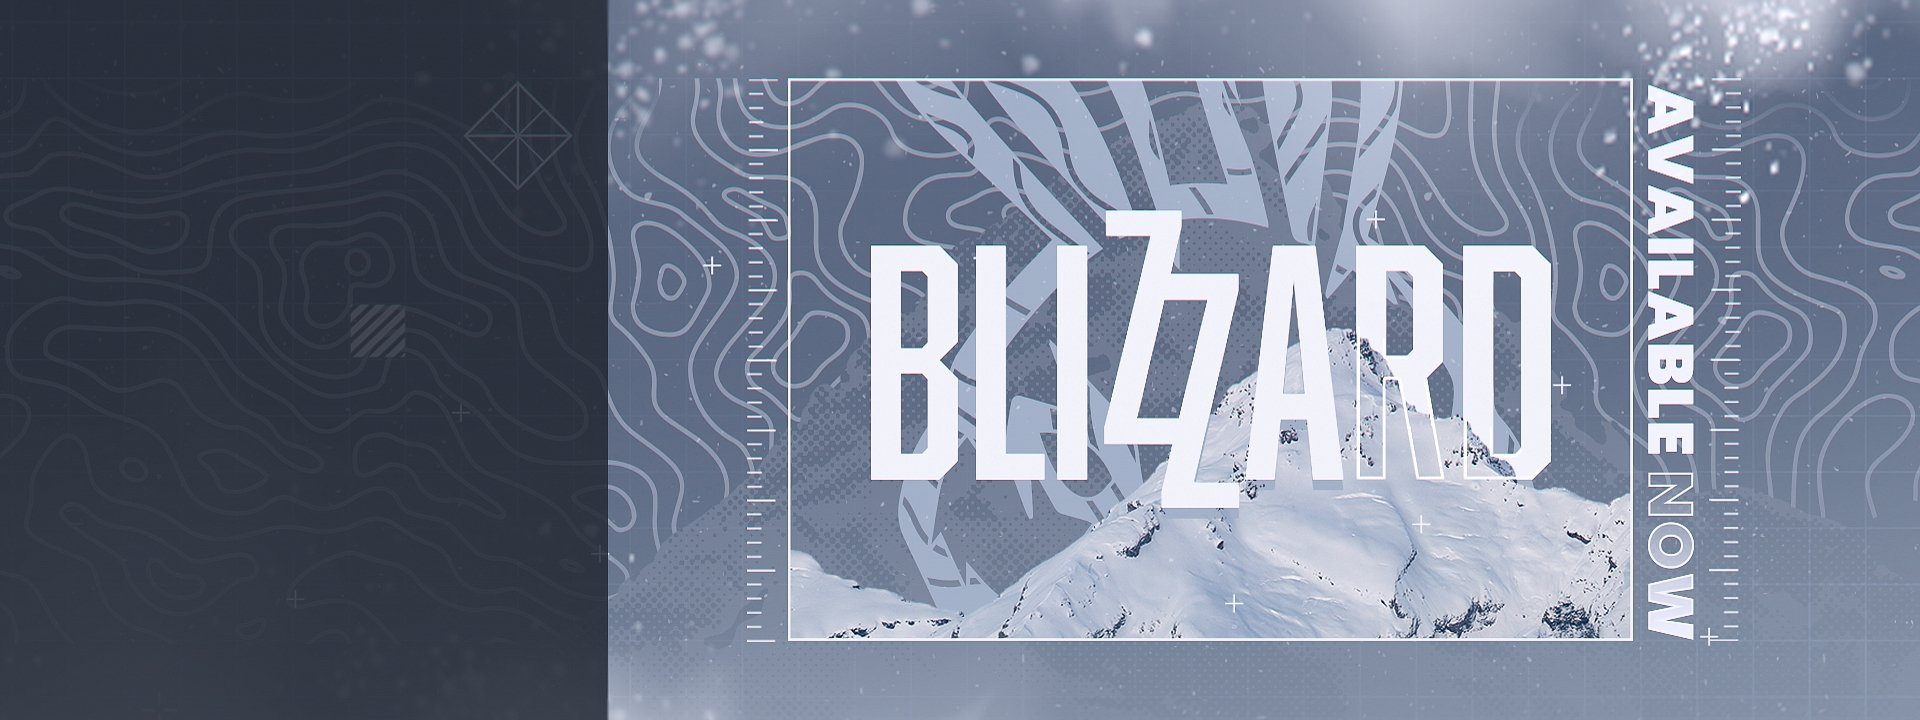
<center><i> Blizzard Sneak Energy (2021). [Blizzard-Website%5B1%5D.jpg]. Retrieved from <a href:https://sneakenergy.com/collections/blizzard> Here </a>
<h3><p style="color:rgb(147,185,199);" align = ceneter>With a bit of knowledge of the product range we now understand the reason this is the most retweeted item is because a new flavour is being reintroduced for it's seasonal release </p></h3>
    
<p color: #e3e8ed>So now we know one thing people might be talking about, why don't we have a look at what they are saying? 
We have three data sources each with text data, lets combined these and create a word cloud of 'Blizzard'



In [20]:
#Subsetting all the Exports to just the text column

TweetText <- SneakTweets_df[,c("text")]
InstaText <- SneakInsta_df# Load the library
FacebookText <- SneakFacebook_df[,c("text")]

# Load libraries
library(wordcloud)
library(RColorBrewer)
# Load the library qdap
library(qdap)

# Extract term frequencies for top 60 words in the Corpus and view the output
trms_freq <- freq_terms(twt_stpwrds,60)
head(trms_freq,60)


Warning message:
"package 'wordcloud' was built under R version 3.6.3"Loading required package: RColorBrewer
